<img src = "images.jpg">


#  Perguntas:
   1. Qual país que há mais ataque dos tubarões? E qual país que há mais casos fatais?
   2. Em que ano houve mais ataques?
   3. E qual tipo de atividades que houve mais ataques?
   

# Analisando e limpando dados:

## Importando a biblioteca e os dados

In [2]:
import pandas as pd

In [3]:
attacks = pd.read_csv('data/attacks.csv')

In [4]:
attacks.head()

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,...,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,NaN,NaN
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson�McNeely,F,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,NaN,NaN
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,NaN,NaN
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,...,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,NaN,NaN
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,...,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,NaN,NaN


In [28]:
attacks.shape

(25723, 24)

## Verificando as colunas 

In [5]:
# Verificando quantidade de dados nulos
attacks.isnull().sum().sort_values(ascending = False)

Unnamed: 22               25722
Unnamed: 23               25721
Time                      22775
Species                   22259
Age                       22252
Sex                       19986
Activity                  19965
Location                  19961
Fatal (Y/N)               19960
Area                      19876
Name                      19631
Country                   19471
Injury                    19449
Investigator or Source    19438
Type                      19425
Year                      19423
href formula              19422
Date                      19421
pdf                       19421
href                      19421
Case Number.1             19421
Case Number.2             19421
original order            19414
Case Number               17021
dtype: int64

<AxesSubplot:>

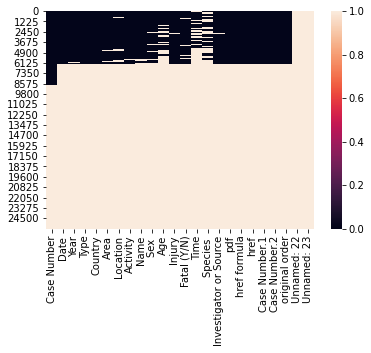

In [6]:
import seaborn as sns
sns.heatmap(attacks.isnull())

## Excluindo colunas irrelevantes

In [7]:
attacks = attacks.drop(columns =['pdf', 'href formula', 'href',
       'Case Number.1', 'Case Number.2', 'original order', 'Unnamed: 22',
       'Unnamed: 23'])

In [8]:
attacks.head(2)

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark,"R. Collier, GSAF"
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson�McNeely,F,11,Minor injury to left thigh,N,14h00 -15h00,NaN,"K.McMurray, TrackingSharks.com"


In [9]:
attacks.shape

(25723, 16)

## Excluindo linhas sem informações

In [10]:
attacks = attacks.dropna(thresh = 2)      

In [11]:
attacks

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark,"R. Collier, GSAF"
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson�McNeely,F,11,Minor injury to left thigh,N,14h00 -15h00,NaN,"K.McMurray, TrackingSharks.com"
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,07h45,NaN,"K.McMurray, TrackingSharks.com"
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,NaN,Minor injury to lower leg,N,NaN,2 m shark,"B. Myatt, GSAF"
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,NaN,Lacerations to leg & hand shark PROVOKED INCIDENT,N,NaN,"Tiger shark, 3m",A .Kipper
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6297,ND.0005,Before 1903,0.0,Unprovoked,AUSTRALIA,Western Australia,Roebuck Bay,Diving,male,M,NaN,FATAL,Y,NaN,NaN,"H. Taunton; N. Bartlett, p. 234"
6298,ND.0004,Before 1903,0.0,Unprovoked,AUSTRALIA,Western Australia,NaN,Pearl diving,Ahmun,M,NaN,FATAL,Y,NaN,NaN,"H. Taunton; N. Bartlett, pp. 233-234"
6299,ND.0003,1900-1905,0.0,Unprovoked,USA,North Carolina,Ocracoke Inlet,Swimming,Coast Guard personnel,M,NaN,FATAL,Y,NaN,NaN,"F. Schwartz, p.23; C. Creswell, GSAF"
6300,ND.0002,1883-1889,0.0,Unprovoked,PANAMA,NaN,"Panama Bay 8�N, 79�W",NaN,Jules Patterson,M,NaN,FATAL,Y,NaN,NaN,"The Sun, 10/20/1938"


## Ajustando os nomes das colunas

In [12]:
attacks.columns

Index(['Case Number', 'Date', 'Year', 'Type', 'Country', 'Area', 'Location',
       'Activity', 'Name', 'Sex ', 'Age', 'Injury', 'Fatal (Y/N)', 'Time',
       'Species ', 'Investigator or Source'],
      dtype='object')

In [13]:
attacks =attacks.rename(columns = { 'Sex ':'Sex',  'Species ':'Species' })

In [14]:
attacks.columns = ['case number', 'date', 'year', 'type', 'country', 'area', 'location',
       'activity', 'name', 'sex', 'age', 'injury', 'fatal', 'time',
       'species', 'investigator or source']

In [15]:
attacks.head(2)

,case number,date,year,type,country,area,location,activity,name,sex,age,injury,fatal,time,species,investigator or source
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark,"R. Collier, GSAF"
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson�McNeely,F,11,Minor injury to left thigh,N,14h00 -15h00,NaN,"K.McMurray, TrackingSharks.com"


<AxesSubplot:>

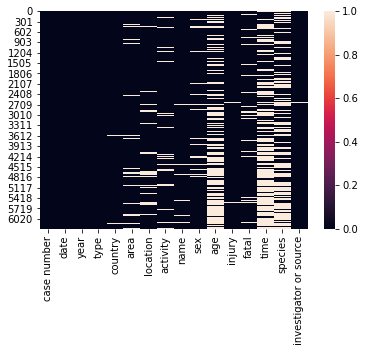

In [16]:
import seaborn as sns
sns.heatmap(attacks.isnull())

In [17]:
attacks['activity'].value_counts(normalize= True).head(10)

Surfing         0.168635
Swimming        0.150920
Fishing         0.074852
Spearfishing    0.057833
Bathing         0.028135
Wading          0.025877
Diving          0.022056
Standing        0.017193
Snorkeling      0.015457
Scuba diving    0.013199
Name: activity, dtype: float64

## Tratamento as datas

In [18]:
def try_datetime(value):
    try: 
        return pd.to_datetime(value)
    except:
        return np.nan

In [19]:
attacks['date'] = attacks.date.map(try_datetime)

In [20]:
attacks['years'] = pd.to_datetime(attacks['date']).dt.year
attacks['years']

0       2018.0
1       2018.0
2       2018.0
3       2018.0
4       2018.0
         ...  
6297       NaN
6298       NaN
6299       NaN
6300       NaN
6301       NaN
Name: years, Length: 6302, dtype: float64

## Tratando os países e as areas

In [21]:
def country_lines(rows):
    try:
        rows = rows.lower().strip()
        return rows
    except:
        return rows

In [22]:
attacks['country'] = attacks['country'].apply(country_lines)

In [23]:
attacks['country']=np.where(attacks['country']=='asia?','asia',attacks['country'])
attacks['country']=np.where(attacks['country']=='ceylon (sri lanka)','sri lanka',attacks['country'])
attacks['country']=np.where(attacks['country']=='maldive islands','maldives',attacks['country'])
attacks['country']=np.where(attacks['country']=='okinawa','japan',attacks['country'])
attacks['country']=np.where(attacks['country']=='red sea?','red sea',attacks['country'])
attacks['country']=np.where(attacks['country']=='reunion island','reunion',attacks['country'])
attacks['country']=np.where(attacks['country']=='korea','south korea',attacks['country'])
attacks['country']=np.where(attacks['country']=='st. maartin','st.martin',attacks['country'])
attacks['country']=np.where(attacks['country']=='sudan?','sudan',attacks['country'])
attacks['country']=np.where(attacks['country']=='united arab emirates (uae)','united arab emirates',attacks['country'])

In [22]:
attacks['country'].unique()

array(['usa', 'australia', 'mexico', 'brazil', 'england', 'south africa',
       'thailand', 'costa rica', 'maldives', 'bahamas', 'new caledonia',
       'ecuador', 'malaysia', 'libya', nan, 'cuba', 'mauritius',
       'new zealand', 'spain', 'samoa', 'solomon islands', 'japan',
       'egypt', 'st helena, british overseas territory', 'comoros',
       'reunion', 'french polynesia', 'united kingdom',
       'united arab emirates', 'philippines', 'indonesia', 'china',
       'columbia', 'cape verde', 'fiji', 'dominican republic',
       'cayman islands', 'aruba', 'mozambique', 'puerto rico', 'italy',
       'atlantic ocean', 'greece', 'st. martin', 'france',
       'papua new guinea', 'trinidad & tobago', 'kiribati', 'israel',
       'diego garcia', 'taiwan', 'jamaica', 'palestinian territories',
       'guam', 'seychelles', 'belize', 'nigeria', 'tonga', 'scotland',
       'canada', 'croatia', 'saudi arabia', 'chile', 'antigua', 'kenya',
       'russia', 'turks & caicos', 'azores', 'sou

In [24]:
def area_lines(rows):
    try:
        rows = rows.lower().strip()
        return rows
    except:
        return rows

In [25]:
attacks['area'] = attacks['area'].apply(area_lines)

## Tratamento nas atividades e fatal

In [26]:
def activity_lines(rows):
    try:
        rows = rows.lower()        
        return rows
    except:
        return rows

In [27]:
attacks['activity'] = attacks['activity'].apply(activity_lines)

In [28]:
attacks['activity'].value_counts().head(10)

surfing         971
swimming        869
fishing         431
spearfishing    333
bathing         162
wading          149
diving          127
standing         99
scuba diving     90
snorkeling       89
Name: activity, dtype: int64

In [29]:
attacks['fatal'].unique()

array(['N', 'Y', nan, 'M', 'UNKNOWN', '2017', ' N', 'N ', 'y'],
      dtype=object)

In [30]:
def fatal_lines(rows):
    try:
        rows = rows.lower().strip()
        return rows
    except:
        return rows

In [31]:
attacks['fatal'] = attacks['fatal'].apply(fatal_lines)

In [32]:
attacks['fatal']=np.where(attacks['fatal']=='m','n',attacks['fatal']) #Erro de digitação
attacks['fatal']=np.where(attacks['fatal']=='2017','n',attacks['fatal']) #Pelo contexto não parece ser fatal
attacks['fatal']=np.where(attacks['fatal']=='unknown',0,attacks['fatal']) #transformar unknown para o

In [33]:
attacks['fatal'].value_counts()

n    4303
y    1389
0      71
Name: fatal, dtype: int64

## Analisando os dados

In [34]:
attacks.columns

Index(['case number', 'date', 'year', 'type', 'country', 'area', 'location',
       'activity', 'name', 'sex', 'age', 'injury', 'fatal', 'time', 'species',
       'investigator or source', 'years'],
      dtype='object')

In [35]:
attacks_shark = attacks[['year', 'country', 'area', 'activity', 'fatal']]

In [36]:
attacks_shark

,year,country,area,activity,fatal
0,2018.0,usa,california,paddling,n
1,2018.0,usa,georgia,standing,n
2,2018.0,usa,hawaii,surfing,n
3,2018.0,australia,new south wales,surfing,n
4,2018.0,mexico,colima,free diving,n
...,...,...,...,...,...
6297,0.0,australia,western australia,diving,y
6298,0.0,australia,western australia,pearl diving,y
6299,0.0,usa,north carolina,swimming,y
6300,0.0,panama,NaN,NaN,y


# Respondendo as perguntas:

## Em qual país há mais ataques de tubarão?

In [37]:
attacks_shark['country'].value_counts().head(10)

usa                 2229
australia           1338
south africa         579
papua new guinea     134
new zealand          128
brazil               112
bahamas              109
mexico                90
italy                 71
fiji                  65
Name: country, dtype: int64

In [38]:
attacks_shark['country'].value_counts(normalize = True)

usa                          0.356526
australia                    0.214012
south africa                 0.092610
papua new guinea             0.021433
new zealand                  0.020473
                               ...   
iran / iraq                  0.000160
south china sea              0.000160
falkland islands             0.000160
asia                         0.000160
solomon islands / vanuatu    0.000160
Name: country, Length: 193, dtype: float64

In [39]:
attacks_usa = attacks_shark[attacks_shark['country'] == 'usa']

In [40]:
attacks_usa['area'].value_counts().head()

florida           1038
hawaii             298
california         290
south carolina     160
north carolina     104
Name: area, dtype: int64

In [41]:
attacks_usa['area'].value_counts(normalize = True).head()

florida           0.466517
hawaii            0.133933
california        0.130337
south carolina    0.071910
north carolina    0.046742
Name: area, dtype: float64

## E qual país que há mais casos fatais?

In [42]:
attacks_fatal=attacks_shark.loc[attacks_shark['fatal']=='y',:]
attacks_fatal[['year','fatal','country']].groupby(by=['fatal','country']).count().sort_values(by='year', ascending=False).reset_index()

,fatal,country,year
0,y,australia,283
1,y,usa,186
2,y,south africa,106
3,y,papua new guinea,56
4,y,mexico,43
...,...,...,...
134,y,guam,1
135,y,greenland,1
136,y,ghana,1
137,y,gabon,1


In [43]:
total_fatal=len(attacks_fatal.loc[attacks_fatal['fatal']=='y','fatal'])
total_fatal

1389

In [44]:
australia_fatal=len(attacks_fatal.loc[(attacks_fatal['fatal']=='y') & (attacks_fatal['country']=='australia'),'fatal'])
australia_fatal

283

## Em que ano houve mais ataques?

In [45]:
attacks_shark['year'].value_counts()

2015.0    143
2017.0    136
2016.0    130
2011.0    128
2014.0    127
         ... 
1767.0      1
1816.0      1
1812.0      1
1822.0      1
1748.0      1
Name: year, Length: 249, dtype: int64

In [36]:
attacks_shark[['country', 'years']].groupby('years', sort=False).count().reset_index().head(60)

,years,country
0,2018.0,51
1,2017.0,126
2,2016.0,125
3,2015.0,142
4,2014.0,117
5,2013.0,116
6,2012.0,113
7,2011.0,115
8,2008.0,111
9,2010.0,94


## E qual o tipo de atividades que há mais casos?

In [46]:
attacks_shark['activity'].value_counts().head(20)

surfing            971
swimming           869
fishing            431
spearfishing       333
bathing            162
wading             149
diving             127
standing            99
scuba diving        90
snorkeling          89
body boarding       64
body surfing        49
swimming            47
boogie boarding     45
kayaking            33
pearl diving        32
treading water      32
fell overboard      32
free diving         29
windsurfing         19
Name: activity, dtype: int64

In [47]:
attacks_shark['activity'].value_counts(normalize= True).head(10)

surfing         0.168635
swimming        0.150920
fishing         0.074852
spearfishing    0.057833
bathing         0.028135
wading          0.025877
diving          0.022056
standing        0.017193
scuba diving    0.015630
snorkeling      0.015457
Name: activity, dtype: float64

<AxesSubplot:>

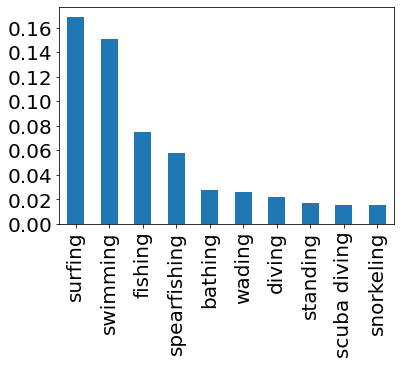

In [48]:
attacks_shark['activity'].value_counts(normalize= True).head(10).plot(kind = 'bar', fontsize = 20)